<a href="https://colab.research.google.com/github/Gaukhar-ai/working-in-pairs/blob/master/Copy_of_Day_28_Lecture_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [ ]:
import warnings
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [ ]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by filtering out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, and waterfront.

In [ ]:
# answer below:
new = king_county[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']]


<function matplotlib.pyplot.show>

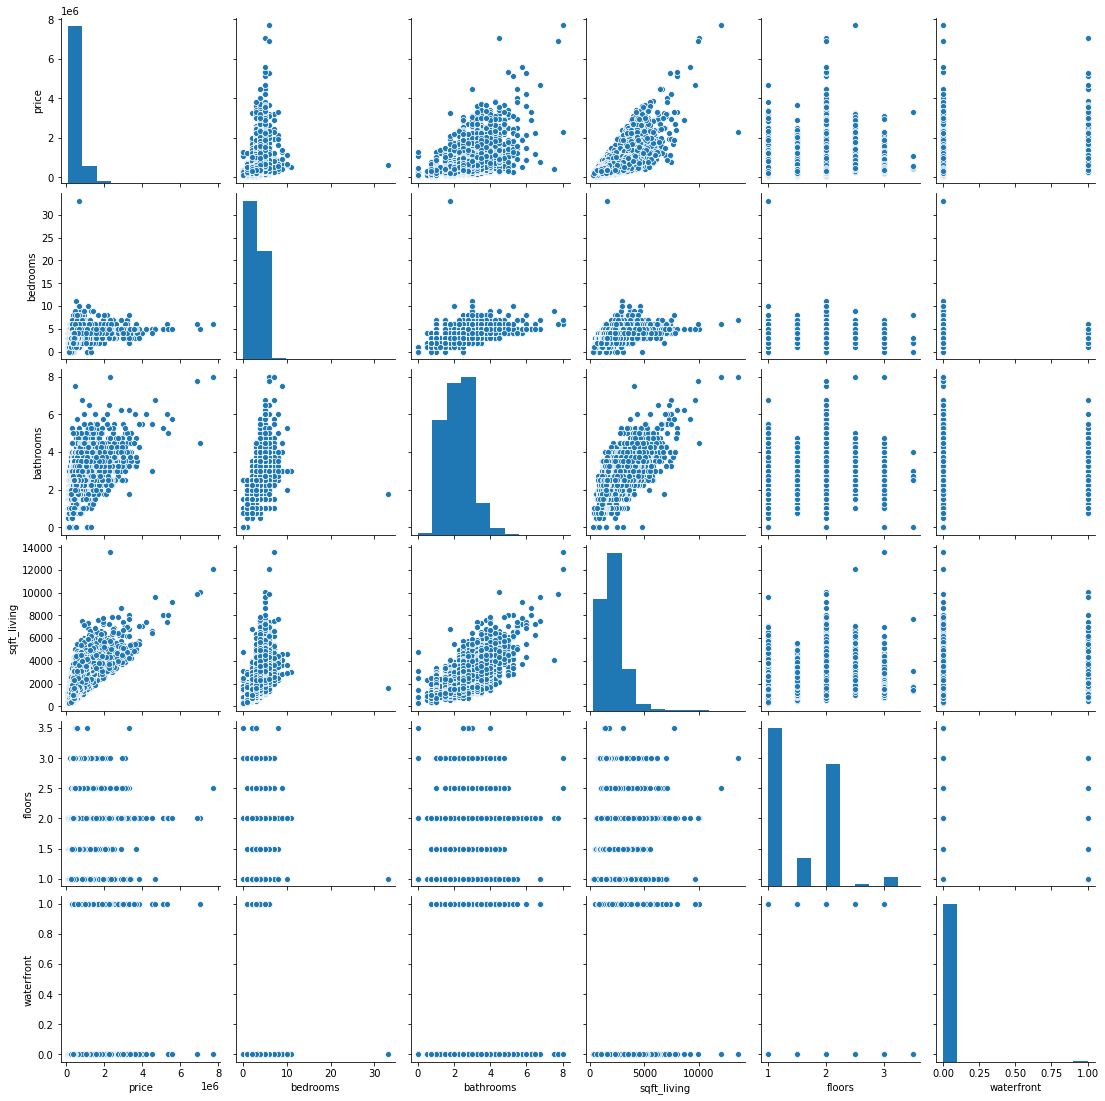

In [ ]:
sns.pairplot(new)
plt.show

<function matplotlib.pyplot.show>

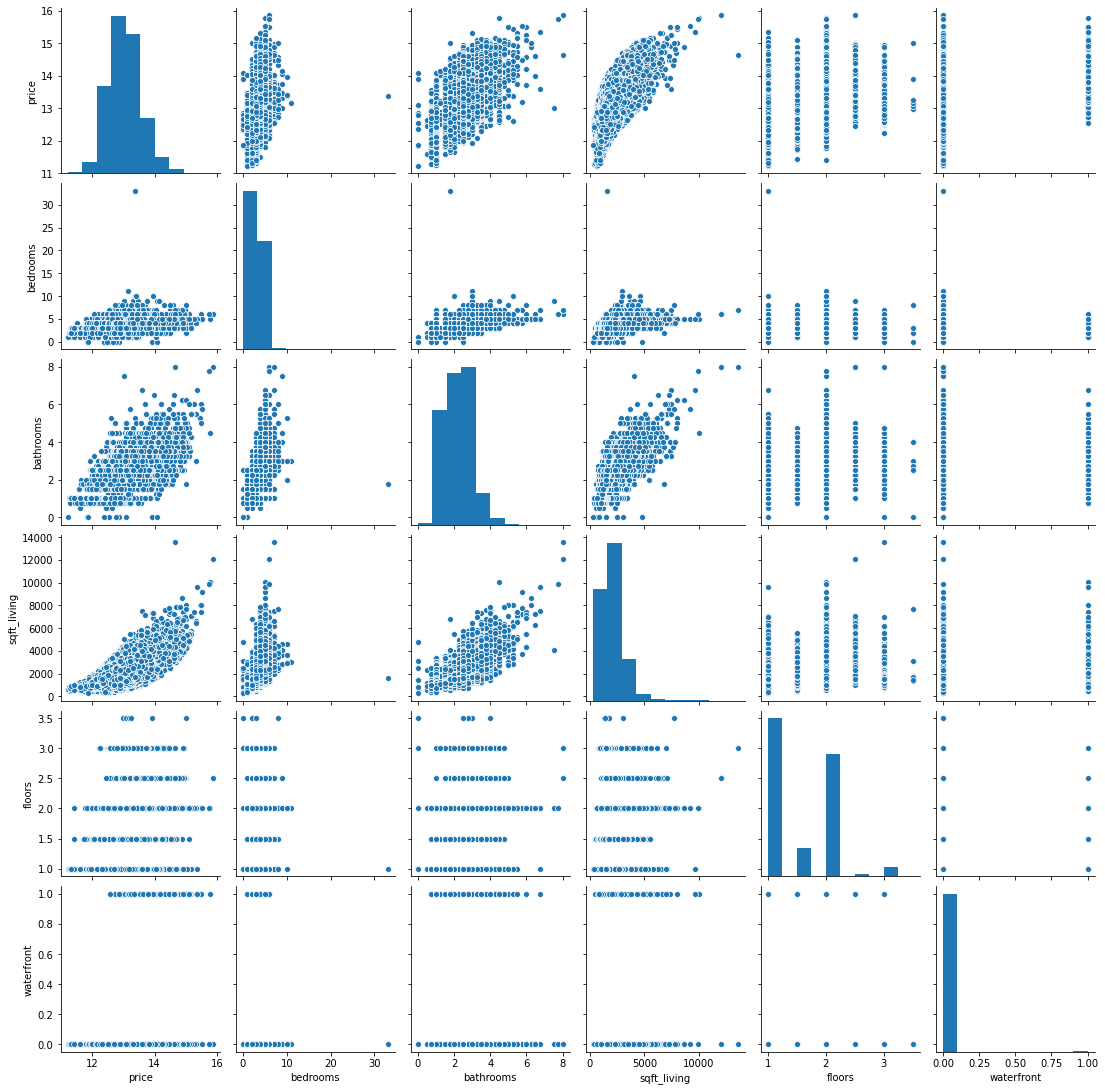

In [ ]:
new_log = new.copy()
new_log['price'] = np.log(new_log['price'])
sns.pairplot(new_log)
plt.show


<function matplotlib.pyplot.show>

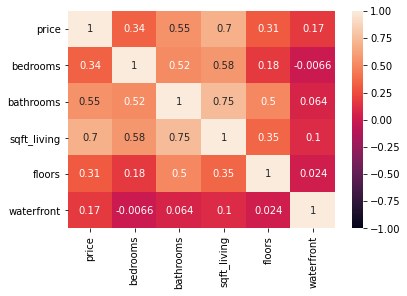

In [ ]:
sns.heatmap(new_log.corr(), vmin = -1, vmax = 1, annot = True)

plt.show

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   waterfront   21613 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


In [ ]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Next create a pair plot in Seaborn to see the relationships between your features.

There are two noticeable outliers here that will cause problems. Remove them.

<function matplotlib.pyplot.show>

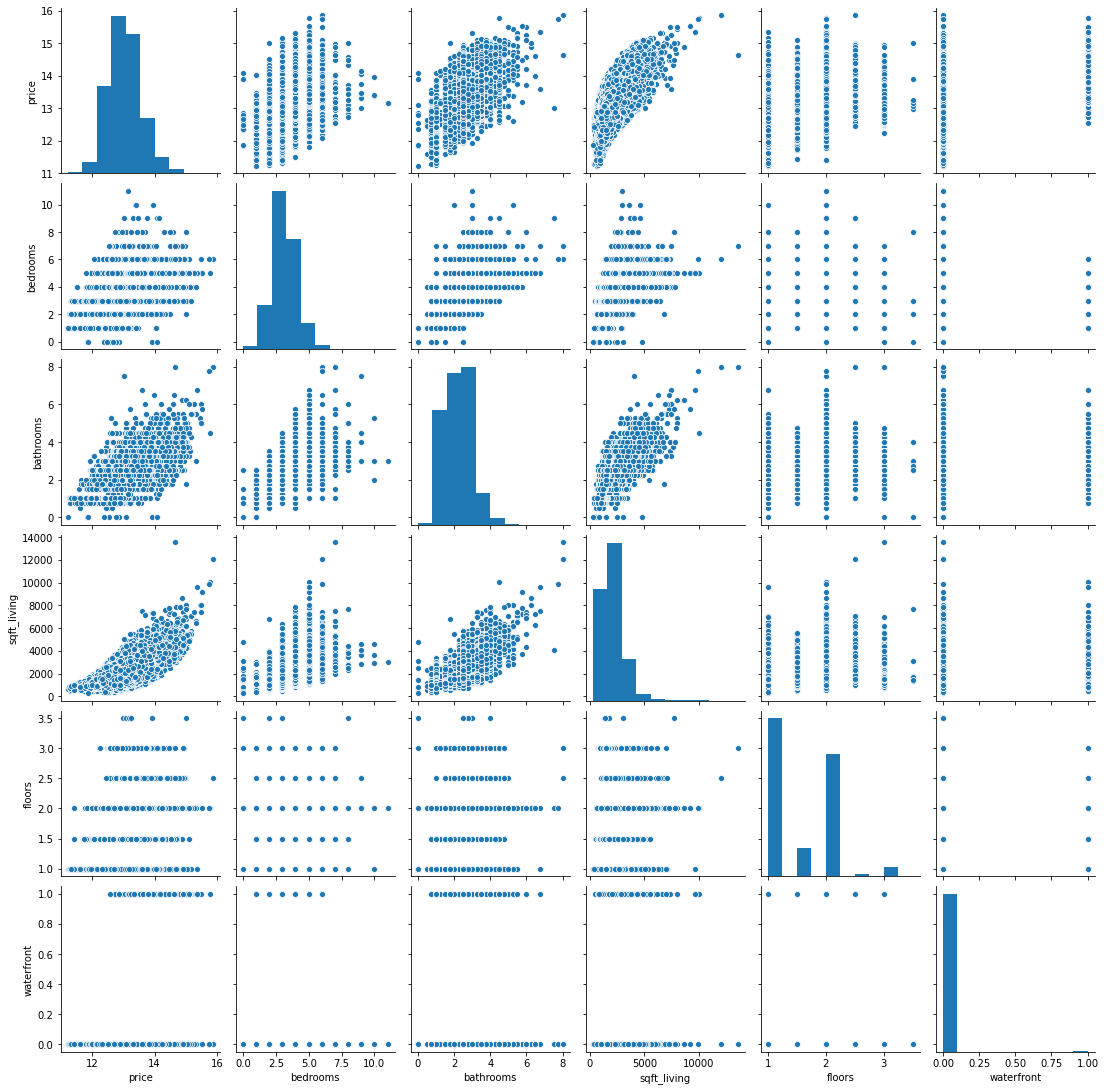

In [ ]:
new_log.drop(index=15870)
sns.pairplot(new_log.drop(index=15870))
plt.show

In [ ]:
new_log.drop(index=15870, inplace = True)
plt.show

<function matplotlib.pyplot.show>

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [ ]:
# answer below:
new_log.isnull().sum()


price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
waterfront     0
dtype: int64

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [ ]:
X = new_log.drop(columns='price')
y = new_log['price']


In [ ]:
# answer below:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

In [ ]:
print_vif(X_train)


VIF results
-------------------------------
const          19.885940
bedrooms        1.612713
bathrooms       2.831610
sqft_living     2.664092
floors          1.358036
waterfront      1.016538
dtype: float64
-------------------------------



Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [ ]:
#answer below:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2



In [ ]:
sm.qqplot(new_log.resid, line="s")
plt.show()

Create your final linear model and produce a model summary. Look at the coefficients and interpret their meaning. How do each of them influence the final prediction?

In [ ]:
# answer below



Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE. How accurate is our model?

In [ ]:
# answer below:

